In [1]:
from mel_processing import get_melspec_from_file, calc_deltas
import os
import glob
import IPython
import torch
import torchaudio
import matplotlib.pyplot as plt
import numpy as np

## データセット内の音声ファイルの平均の長さを計算

Shape of waveform: torch.Size([1, 30475])
Sample rate of waveform: 16000


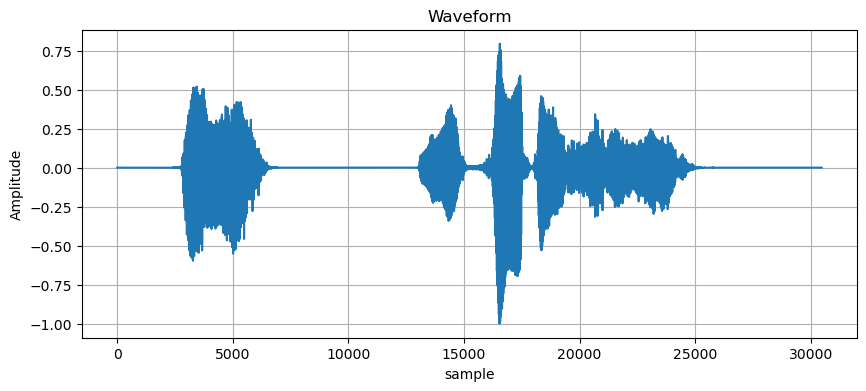

Shape of spec: torch.Size([1, 64, 301])


In [2]:
# filename = 'dataset/esd/0012/Neutral/0012_000001.wav'
# filename = '/work/abelab5/t_tana/emo_clf2/dataset/esd/0020/Happy/0020_000709.wav'
# filename ='/work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/m14/joy/m14_joy_01.wav'
# filename = '/work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Sad/wav/ITA-Emotion100-Teacher-Sad-001.wav'
filename = '/work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Happy/wav/ITA-Emotion100-Teacher-Happy-001.wav'

waveform, sr = torchaudio.load(filepath=filename)
sec_per_sample = 1 / sr
# 波形の形状とサンプルレートの表示
def plot_waveform(waveform, sr):
    print(f"Shape of waveform: {waveform.size()}")
    print(f"Sample rate of waveform: {sr}")
    plt.figure(figsize=(10, 4))
    plt.plot(waveform.t().numpy())
    plt.title('Waveform')
    plt.xlabel('sample')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

plot_waveform(waveform, sr)
log_melspec = get_melspec_from_file(filename, 3.0, False, 25e-3, 10e-3, 25e-3, 64)
log_melspec_emph = get_melspec_from_file(filename, 3.0, True, 25e-3, 10e-3, 25e-3, 64)

print(f"Shape of spec: {log_melspec.size()}")

IPython.display.Audio(filename)



In [3]:
dataset = 'dataset/esd'
wavpath_list = glob.glob(os.path.join(dataset, '**', '*.wav'), recursive=True)
neutral_list = [wavpath for wavpath in wavpath_list if 'Neutral' in wavpath or 'neu' in wavpath]
happy_list = [wavpath for wavpath in wavpath_list if 'Happy' in wavpath or 'joy' in wavpath]
sad_list = [wavpath for wavpath in wavpath_list if 'Sad' in wavpath or 'sad' in wavpath]
angry_list = [wavpath for wavpath in wavpath_list if 'Angry' in wavpath or 'ang' in wavpath]
surprise_list = [wavpath for wavpath in wavpath_list if 'Surprise' in wavpath]
all_dict = {'Neutral':neutral_list, 'Happy':happy_list, 'Sad':sad_list, 'Angry':angry_list, 'Surprise':surprise_list}
emotions = ['Neutral', 'Happy', 'Sad', 'Angry', 'Surprise']
for emotion in emotions:
    print(f'{len(all_dict[emotion])=}')

len(all_dict[emotion])=3500
len(all_dict[emotion])=3500
len(all_dict[emotion])=3500
len(all_dict[emotion])=3500
len(all_dict[emotion])=3500


In [4]:
from mel_processing import calc_n_sample_from_file

# # Surpriseをのぞく音声の平均長を計算
# wavpath_list_without_surprise = [wavpath for wavpath in wavpath_list if 'Surprise' not in wavpath]
# ave_n_sample = 0
# for file in wavpath_list_without_surprise:
#     ave_n_sample += calc_n_sample_from_file(file)
# ave_n_sample //= len(wavpath_list_without_surprise)
# ave_sec = ave_n_sample*sec_per_sample
# print(f'{ave_n_sample=}')
# print(f'{ave_sec=}')


# 波形とメルスペクトログラム，そのdeltaとdelta-delta特徴量で構成される3D-MelSpectrogram
論文（https://www.frontiersin.org/journals/physiology/articles/10.3389/fphys.2021.643202/full ）を参考に実装．

In [5]:
def plot_melspectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(spec, origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# メルスペクトログラム，delta，delta-delta
あらかじめ波形をpre-emphasize(高域強調を適用)しておく．以降はこの波形を使用したメルスペクトログラムを使用．

Shape of waveform: torch.Size([1, 58726])
Sample rate of waveform: 16000


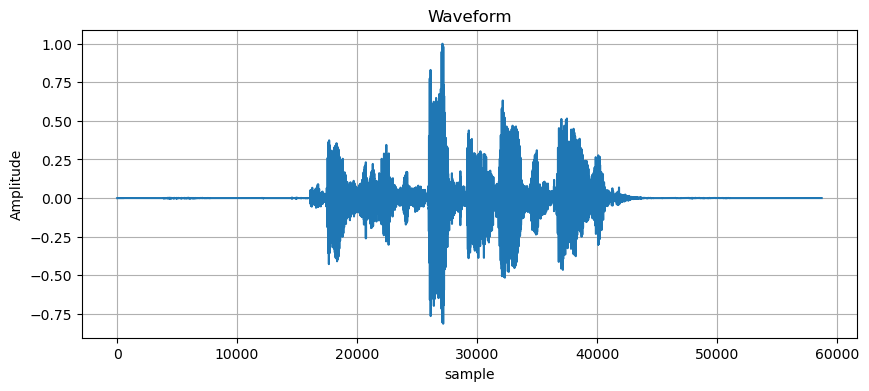

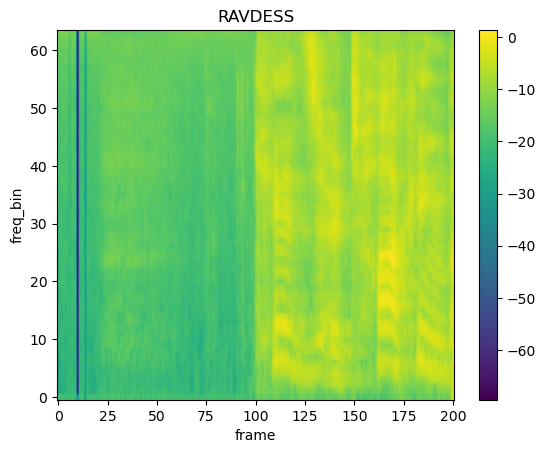

Shape of waveform: torch.Size([1, 52853])
Sample rate of waveform: 16000


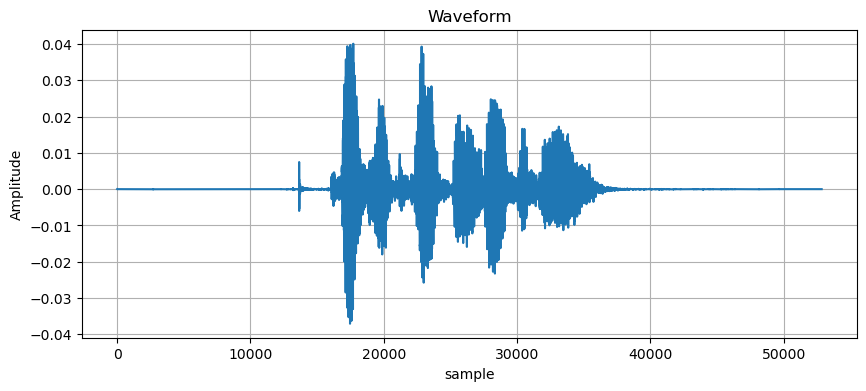

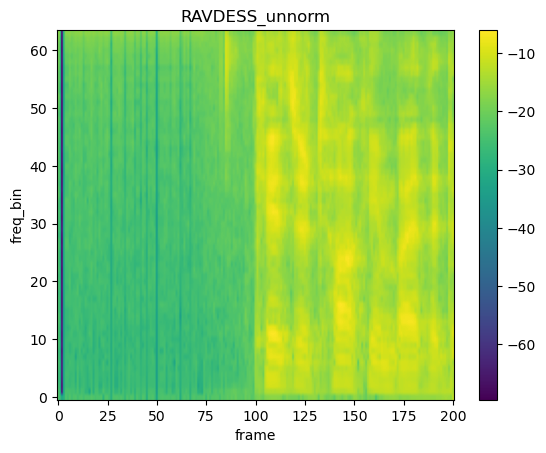

Shape of waveform: torch.Size([1, 52853])
Sample rate of waveform: 16000


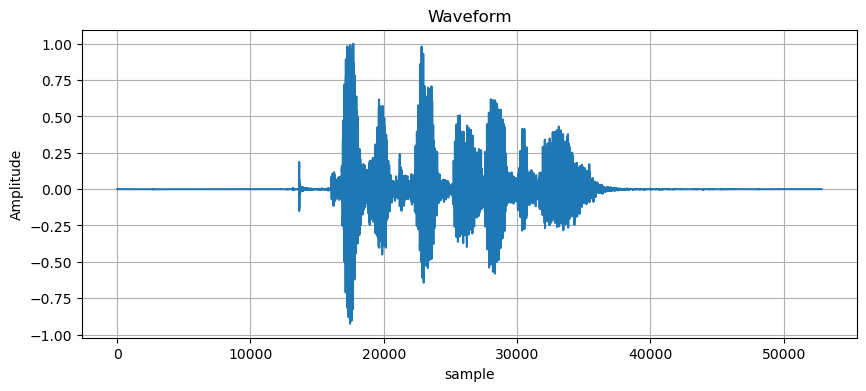

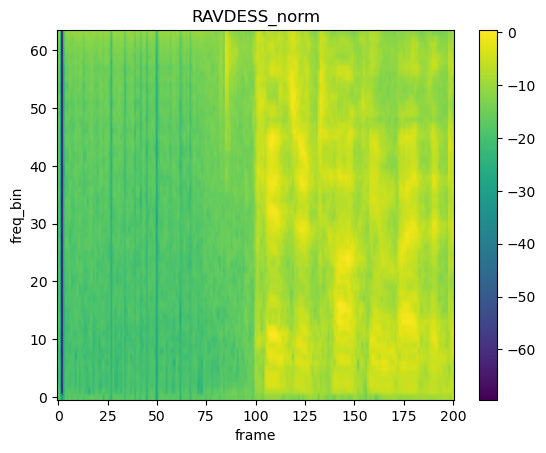

In [24]:
# plot_melspectrogram(log_melspec[0])
# plot_melspectrogram(log_melspec_emph[0], title='Pre-emphasized spectrogram (dB)')

def plot_melspectrogram_from_file(filename, title='sample'):
    log_melspec_emph = get_melspec_from_file(filename, 2.0, True, 25e-3, 10e-3, 25e-3, 64)
    plot_melspectrogram(log_melspec_emph[0], title=title)
    IPython.display.display(IPython.display.Audio(filename))

# filename = '/work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f40/ang/f40_ang_04.wav'
# waveform, sr = torchaudio.load(filepath=filename)
# plot_waveform(waveform, sr)
# plot_melspectrogram_from_file(filename=filename, title='JTES-female')

# filename='/work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f44/ang/f44_ang_03.wav'
# waveform, sr = torchaudio.load(filepath=filename)
# plot_waveform(waveform, sr)
# plot_melspectrogram_from_file(filename=filename, title='JTES-female')

# filename='/work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Angry/wav/ITA-Emotion100-Teacher-Angry-004.wav'
# waveform, sr = torchaudio.load(filepath=filename)
# plot_waveform(waveform, sr)
# plot_melspectrogram_from_file(filename=filename, title='STUDIES-teacher')

# filename='/work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Happy/wav/ITA-Emotion100-Teacher-Happy-019.wav'
# waveform, sr = torchaudio.load(filepath=filename)
# plot_waveform(waveform, sr)
# plot_melspectrogram_from_file(filename=filename, title='STUDIES-teacher')

# filename='/work/abelab5/t_tana/emo_clf2/dataset/ravdess/Actor_01/03-01-03-01-01-01-01.wav'
# waveform, sr = torchaudio.load(filepath=filename)
# plot_waveform(waveform, sr)
# plot_melspectrogram_from_file(filename=filename, title='RAVDESS')

filename='/work/abelab5/t_tana/emo_clf2/dataset/ravdess/Actor_01/03-01-03-02-01-01-01.wav'
waveform, sr = torchaudio.load(filepath=filename)
plot_waveform(waveform, sr)
plot_melspectrogram_from_file(filename=filename, title='RAVDESS')

filename='/work/abelab5/t_tana/emo_clf2/dataset/ravdess_unnorm/Actor_01/03-01-01-01-01-01-01.wav'
waveform, sr = torchaudio.load(filepath=filename)
plot_waveform(waveform, sr)
plot_melspectrogram_from_file(filename=filename, title='RAVDESS_unnorm')

filename='/work/abelab5/t_tana/emo_clf2/dataset/ravdess/Actor_01/03-01-01-01-01-01-01.wav'
waveform, sr = torchaudio.load(filepath=filename)
plot_waveform(waveform, sr)
plot_melspectrogram_from_file(filename=filename, title='RAVDESS_norm')

filename = '/work/abelab5/t_tana/emo_clf2/dataset/esd/0011/Angry/0011_000351.wav'
waveform, sr = torchaudio.load(filepath=filename)
plot_waveform(waveform, sr)
plot_melspectrogram_from_file(filename=filename, title='ESD')

torch.Size([3, 64, 301])


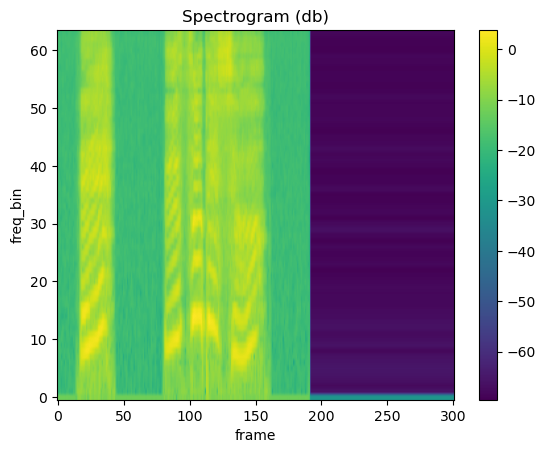

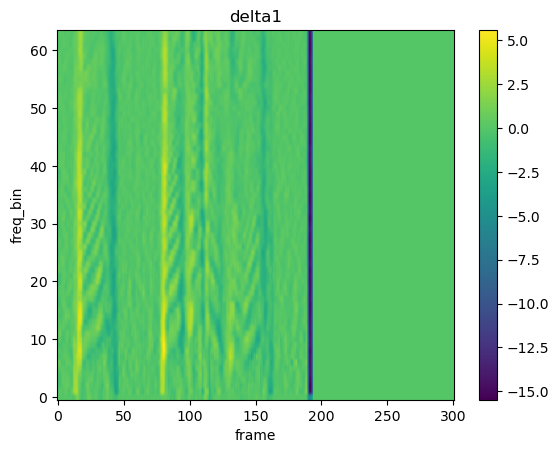

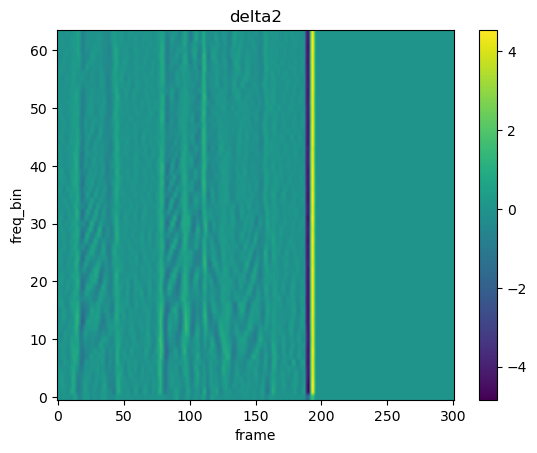

In [7]:
mel_specs_3d = calc_deltas(log_melspec)
print(mel_specs_3d.size())
plot_melspectrogram(mel_specs_3d[0])
plot_melspectrogram(mel_specs_3d[1], title='delta1')
plot_melspectrogram(mel_specs_3d[2], title='delta2')


# 3つの特徴量を重ねて，同じサイズのセグメントに分割
- normalize として0-1で正規化した場合

In [8]:
from preprocess import extract_resized_segments_from_file, get_3dmelspec_from_file, normalize_image

In [9]:
import cv2
import matplotlib.pyplot as plt

def imgShow(imgList, row_num = 1):
    img_num = len(imgList)
    
    if img_num == 1:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.imshow(imgList[0])
    
    else:
        fig, axes = plt.subplots(row_num, round(img_num / row_num))
        ax = axes.ravel()
        for i in range(img_num):
            ax[i].imshow(imgList[i])
            ax[i].axis('off')

    plt.show()

def show_segments(filename, normalizer=None, max_sec=3.0):
    segments = extract_resized_segments_from_file(filename, normalizer=normalizer, max_sec=max_sec)
    print(f'{segments.size()=}')
    imgs = [segments[idx].permute(*torch.arange(segments[idx].ndim - 1, -1, -1)).permute(1, 0, 2) for idx in range(segments.size(0))]
    imgShow(imgs)
    return segments



/work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Happy/wav/ITA-Emotion100-Teacher-Happy-019.wav


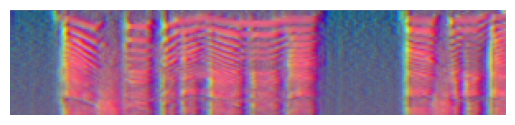

In [10]:
print(filename)
melspec_3d = get_3dmelspec_from_file(filepath=filename, max_sec=3.0, pre_emph=True, fft_sec=25e-3, hop_sec=10e-3, window_sec=25e-3, n_mels=64)
melspec_3d = normalize_image(melspec_3d)
plt.imshow(melspec_3d.permute(1, 2, 0).numpy())
plt.axis('off')
plt.show()

学習スクリプトの実装では最大長は全音声の平均長ではなく，3sにしているが，以下はデータセットの平均長を最大長にしているため，7枚の画像になる．（3sの場合は8枚になる）

segments.size()=torch.Size([8, 3, 227, 227])


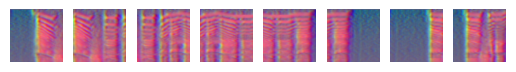

tensor([[[0.3528, 0.3528, 0.3527,  ..., 0.4178, 0.4128, 0.4128],
         [0.3528, 0.3528, 0.3527,  ..., 0.4178, 0.4128, 0.4128],
         [0.3156, 0.3156, 0.3136,  ..., 0.4302, 0.4247, 0.4247],
         ...,
         [0.4159, 0.4159, 0.4174,  ..., 0.7429, 0.7400, 0.7400],
         [0.4167, 0.4167, 0.4178,  ..., 0.7360, 0.7334, 0.7334],
         [0.4167, 0.4167, 0.4178,  ..., 0.7360, 0.7334, 0.7334]],

        [[0.3952, 0.3952, 0.3931,  ..., 0.4049, 0.4125, 0.4125],
         [0.3952, 0.3952, 0.3931,  ..., 0.4049, 0.4125, 0.4125],
         [0.3504, 0.3504, 0.3539,  ..., 0.3947, 0.3999, 0.3999],
         ...,
         [0.3845, 0.3845, 0.3850,  ..., 0.3485, 0.3536, 0.3536],
         [0.3872, 0.3872, 0.3870,  ..., 0.3469, 0.3520, 0.3520],
         [0.3872, 0.3872, 0.3870,  ..., 0.3469, 0.3520, 0.3520]],

        [[0.5500, 0.5500, 0.5471,  ..., 0.5163, 0.5189, 0.5189],
         [0.5500, 0.5500, 0.5471,  ..., 0.5163, 0.5189, 0.5189],
         [0.5814, 0.5814, 0.5802,  ..., 0.5208, 0.5251, 0.

In [11]:
segments = show_segments(filename, max_sec=3)
print(segments[6])

- 0-1normalize + ImageNetの設定でnormalizeの場合

注）RGBの値ではないので正常に表示不可能

In [12]:
import torchvision.transforms as T
ave_sec = 3

segments.size()=torch.Size([8, 3, 227, 227])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


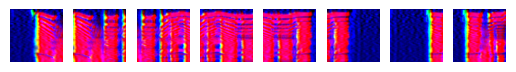

tensor([[[-0.5771, -0.5771, -0.5779,  ..., -0.2936, -0.3154, -0.3154],
         [-0.5771, -0.5771, -0.5779,  ..., -0.2936, -0.3154, -0.3154],
         [-0.7397, -0.7397, -0.7486,  ..., -0.2394, -0.2635, -0.2635],
         ...,
         [-0.3019, -0.3019, -0.2952,  ...,  1.1260,  1.1135,  1.1135],
         [-0.2983, -0.2983, -0.2936,  ...,  1.0962,  1.0845,  1.0845],
         [-0.2983, -0.2983, -0.2936,  ...,  1.0962,  1.0845,  1.0845]],

        [[-0.2714, -0.2714, -0.2808,  ..., -0.2281, -0.1942, -0.1942],
         [-0.2714, -0.2714, -0.2808,  ..., -0.2281, -0.1942, -0.1942],
         [-0.4714, -0.4714, -0.4558,  ..., -0.2738, -0.2506, -0.2506],
         ...,
         [-0.3191, -0.3191, -0.3170,  ..., -0.4800, -0.4571, -0.4571],
         [-0.3072, -0.3072, -0.3081,  ..., -0.4870, -0.4642, -0.4642],
         [-0.3072, -0.3072, -0.3081,  ..., -0.4870, -0.4642, -0.4642]],

        [[ 0.6401,  0.6401,  0.6269,  ...,  0.4903,  0.5016,  0.5016],
         [ 0.6401,  0.6401,  0.6269,  ...,  0

In [13]:
segments = show_segments(filename, normalizer=T.Normalize(mean = (0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)), max_sec=ave_sec)
print(segments[6])

# その他の音声を見る

- 同じ文で同じ感情，異なる話者の場合

listen /work/abelab5/t_tana/emo_clf2/dataset/esd/0017/Angry/0017_000351.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


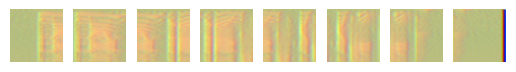

listen /work/abelab5/t_tana/emo_clf2/dataset/esd/0018/Angry/0018_000351.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


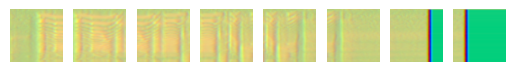

listen /work/abelab5/t_tana/emo_clf2/dataset/esd/0012/Angry/0012_000351.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


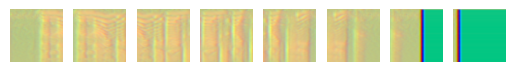

listen /work/abelab5/t_tana/emo_clf2/dataset/esd/0020/Angry/0020_000351.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


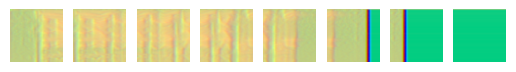

In [14]:
filelist = ['/work/abelab5/t_tana/emo_clf2/dataset/esd/0017/Angry/0017_000351.wav', 
            '/work/abelab5/t_tana/emo_clf2/dataset/esd/0018/Angry/0018_000351.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/esd/0012/Angry/0012_000351.wav', 
            '/work/abelab5/t_tana/emo_clf2/dataset/esd/0020/Angry/0020_000351.wav',]

for file in filelist:
    print(f'listen {file} ↓')
    IPython.display.display(IPython.display.Audio(file))
    show_segments(file, max_sec=ave_sec)

- 同じ文で同じ話者，感情が異なる場合

listen /work/abelab5/t_tana/emo_clf2/dataset/esd/0020/Angry/0020_000359.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


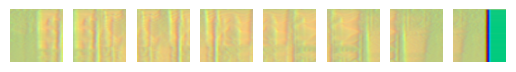

listen /work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/ang/f01_ang_01.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


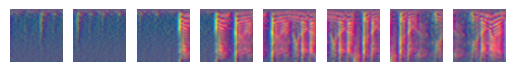

listen /work/abelab5/t_tana/emo_clf2/dataset/esd/0020/Happy/0020_000709.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


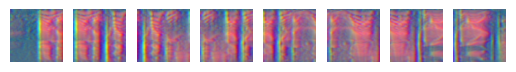

listen /work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/joy/f01_joy_01.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


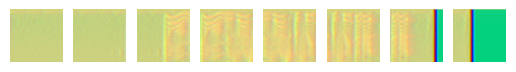

listen /work/abelab5/t_tana/emo_clf2/dataset/esd/0020/Neutral/0020_000009.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


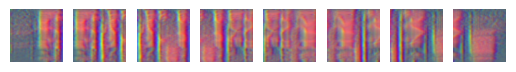

listen /work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/neu/f01_neu_01.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


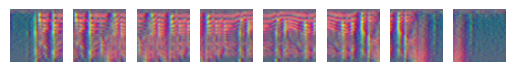

listen /work/abelab5/t_tana/emo_clf2/dataset/esd/0020/Sad/0020_001059.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


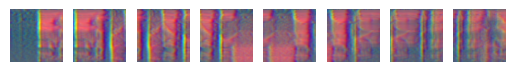

listen /work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/sad/f01_sad_01.wav ↓


segments.size()=torch.Size([8, 3, 227, 227])


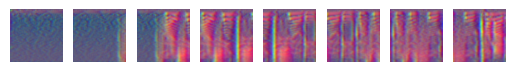

In [15]:
filelist = ['/work/abelab5/t_tana/emo_clf2/dataset/esd/0020/Angry/0020_000359.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/ang/f01_ang_01.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/esd/0020/Happy/0020_000709.wav', 
            '/work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/joy/f01_joy_01.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/esd/0020/Neutral/0020_000009.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/neu/f01_neu_01.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/esd/0020/Sad/0020_001059.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/sad/f01_sad_01.wav']

for file in filelist:
    print(f'listen {file} ↓')
    IPython.display.display(IPython.display.Audio(file))
    show_segments(file, max_sec=ave_sec)

# STUDIES-Teacher

listen /work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Angry/wav/ITA-Emotion100-Teacher-Angry-001.wav ↓


segments.size()=torch.Size([11, 3, 227, 227])


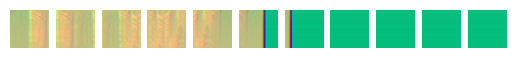

listen /work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/ang/f01_ang_01.wav ↓


segments.size()=torch.Size([11, 3, 227, 227])


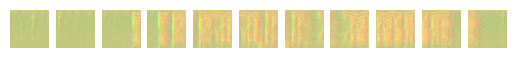

listen /work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Happy/wav/ITA-Emotion100-Teacher-Happy-001.wav ↓


segments.size()=torch.Size([11, 3, 227, 227])


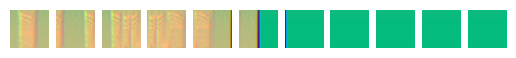

listen /work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/joy/f01_joy_01.wav ↓


segments.size()=torch.Size([11, 3, 227, 227])


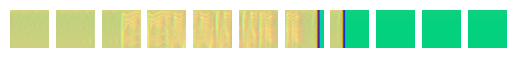

listen /work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Normal/wav/ITA-Emotion100-Teacher-Normal-001.wav ↓


segments.size()=torch.Size([11, 3, 227, 227])


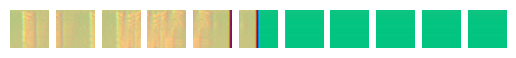

listen /work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/neu/f01_neu_01.wav ↓


segments.size()=torch.Size([11, 3, 227, 227])


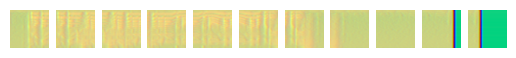

listen /work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Sad/wav/ITA-Emotion100-Teacher-Sad-001.wav ↓


segments.size()=torch.Size([11, 3, 227, 227])


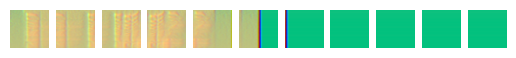

listen /work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/sad/f01_sad_01.wav ↓


segments.size()=torch.Size([11, 3, 227, 227])


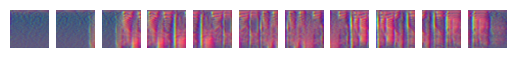

In [16]:
filelist = ['/work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Angry/wav/ITA-Emotion100-Teacher-Angry-001.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/ang/f01_ang_01.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Happy/wav/ITA-Emotion100-Teacher-Happy-001.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/joy/f01_joy_01.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Normal/wav/ITA-Emotion100-Teacher-Normal-001.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/neu/f01_neu_01.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/studies/ITA/Emotion100-Sad/wav/ITA-Emotion100-Teacher-Sad-001.wav',
            '/work/abelab5/t_tana/emo_clf2/dataset/jtes/wav/f01/sad/f01_sad_01.wav'
]
for file in filelist:
    print(f'listen {file} ↓')
    IPython.display.display(IPython.display.Audio(file))
    show_segments(file, max_sec=4)

In [17]:
filelists = ['/work/abelab5/t_tana/emo_clf2/filelists/studies/all/studies_audio_sid_text_test_filelist.txt',
              '/work/abelab5/t_tana/emo_clf2/filelists/studies/all/studies_audio_sid_text_train_filelist.txt', 
              '/work/abelab5/t_tana/emo_clf2/filelists/studies/all/studies_audio_sid_text_val_filelist.txt']
neutral = 0
happy = 0
sad = 0
angry = 0
for filelist in filelists:
    with open(filelist, 'r') as f:
        lines = f.readlines()
    for line in lines:
        emotion = int(line.split(sep='|')[3])
        if emotion == 0:
            neutral += 1
        elif emotion == 1:
            happy += 1
        elif emotion == 2:
            sad += 1
        elif emotion == 3:
            angry += 1
print(f'{neutral=}')
print(f'{happy=}')
print(f'{sad=}')
print(f'{angry=}')


dataset = 'dataset/studies'
wavpath_list = glob.glob(os.path.join(dataset, '**', '*.wav'), recursive=True)
waveform, sr = torchaudio.load(filepath=wavpath_list[0])
wavpath_list = [wav for wav in wavpath_list if 'Teacher' in wav]
avg_sec = (sum([calc_n_sample_from_file(wav) for wav in wavpath_list]) / sr) / len(wavpath_list)
print(avg_sec)


neutral=2220
happy=715
sad=312
angry=118
6.186080609212482


JTES -> 新しく学習 -> SERモデル（JTES）

STUDIES-Teacher -> SERモデル（JTES）に追加で学習 -> SERモデル（JTES + STUDIES-Teacher）

